In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('Salary_dataset.csv',index_col=0)
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [9]:
data.shape

(30, 2)

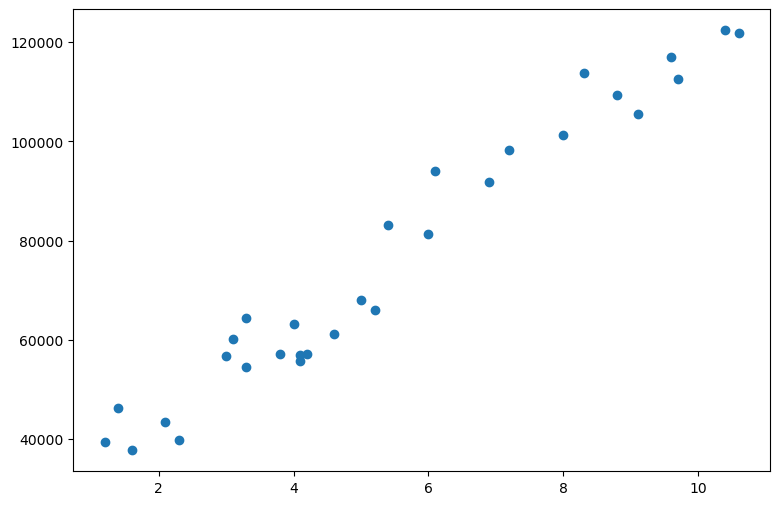

In [13]:
fig, axe = plt.subplots(figsize=(9,6))
axe.scatter(data['YearsExperience'],data['Salary'])

In [32]:
X = pd.DataFrame(data['YearsExperience'])
y = data['Salary']

In [33]:
X.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [34]:
y.head()

0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64

## Let's standardize the data

In [35]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
print(f"Peak value of raw X: {X.max()}")
print(f"Peak value of norm X: {X_norm.max()}")

Peak value of raw X: YearsExperience    10.6
dtype: float64
Peak value of norm X: 1.8588942781010316


## Splitting data into training and test (80,20)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [38]:
X_train.shape

(24, 1)

## Let's train a model

In [41]:
sgdr = SGDRegressor()
sgdr.fit(X_train,y_train)
print(sgdr)
print(f"No. of iterationf: {sgdr.n_iter_}, number of weights updates: {sgdr.t_}")

SGDRegressor()
No. of iterationf: 95, number of weights updates: 2281.0


## Make Prediction

In [42]:
y_train_pred = sgdr.predict(X_train)
y_test_pred = sgdr.predict(X_test)

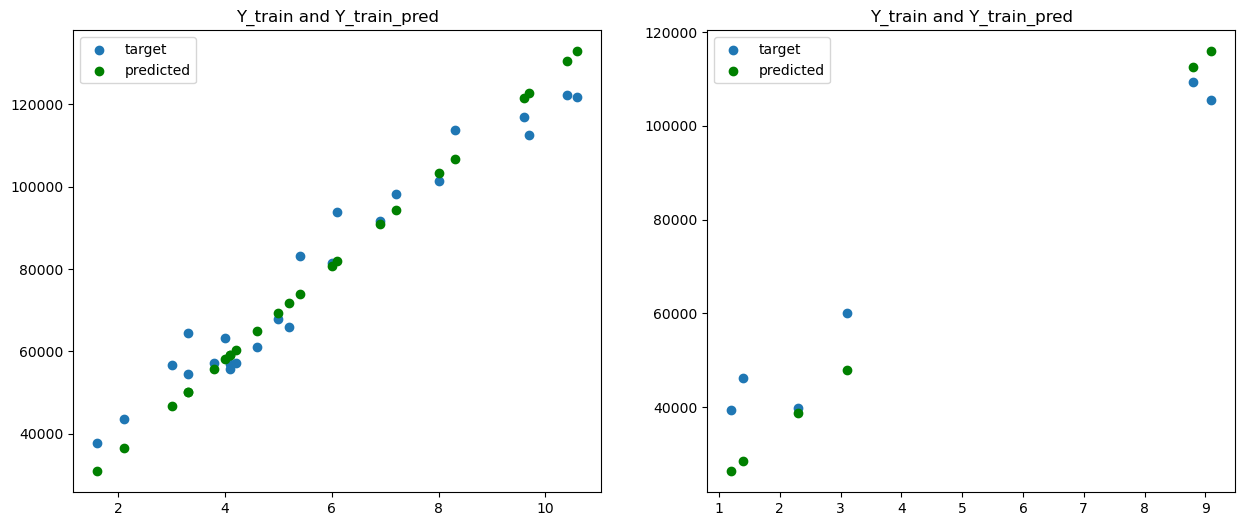

In [50]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,6))

ax1.set_title("Y_train and Y_train_pred")
ax1.scatter(X_train,y_train, label="target")
ax1.scatter(X_train,y_train_pred, c='g',label="predicted")
ax1.legend()

ax2.set_title("Y_train and Y_train_pred")
ax2.scatter(X_test,y_test, label="target")
ax2.scatter(X_test,y_test_pred, c='g',label="predicted")
ax2.legend()